In [1]:
# Core Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from scipy import stats
from scipy.stats import randint, uniform

In [4]:
import tensorflow as tf

In [19]:
from pathlib import Path

## IMPORT & EXPLORE

#### FUNCTIONS

In [34]:
def load_images(image_paths, target_size=(224, 224)):
    from PIL import Image
    import numpy as np
    import tensorflow as tf

    loaded_images = []
    successful_paths = []

    for path in image_paths:
        try:
            with Image.open(path).convert("RGB") as img:
                img = img.resize(target_size)
                img_array = np.array(img) / 255.0
                loaded_images.append(tf.convert_to_tensor(img_array, dtype=tf.float32))
                successful_paths.append(str(Path(path)))
        except Exception as e:
            print(f"Error loading image at {path}: {e}")

    return loaded_images, successful_paths


In [41]:
def display_examples(images, labels, num_examples=5):
    plt.figure(figsize=(10, 10))
    
    for i in range(num_examples):
        ax = plt.subplot(1, num_examples, i + 1)
        ax.imshow(images[i])  # Display the image
        ax.set_title(f"Label: {labels[i]}")  # Display the label
        ax.axis("off")  # Hide axes
    
    plt.show()

#### DATA

In [2]:
flip_books_data = pd.read_csv(r"C:\Users\User\Desktop\DATA SCIENCE\Github\flip_book\data\flip_books_data_cleaned.csv.gz")

In [30]:
flip_books_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5525 entries, 0 to 5524
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               5525 non-null   object
 1   price_original      5525 non-null   int64 
 2   discount            5525 non-null   int64 
 3   publisher           5525 non-null   object
 4   binding             5525 non-null   object
 5   reviews_count       5525 non-null   int64 
 6   description         5525 non-null   object
 7   book_url            5525 non-null   object
 8   local_image_path    5525 non-null   object
 9   main_image_url      5525 non-null   object
 10  category            5525 non-null   object
 11  windows_image_path  5525 non-null   object
 12  publisher_code      5525 non-null   int64 
 13  binding_code        5525 non-null   int64 
 14  category_id         5525 non-null   int64 
dtypes: int64(6), object(9)
memory usage: 647.6+ KB


In [35]:
from pathlib import Path

flip_books_data['normalized_path'] = flip_books_data['windows_image_path'].apply(lambda p: str(Path(p)))
flip_books_image_paths = flip_books_data['normalized_path'].tolist()

flip_books_images, successful_paths = load_images(flip_books_image_paths)

Error loading image at C:\Users\User\Desktop\DATA SCIENCE\DataSets\flip_book_data\biography\images\Дневник_Анны_Франк_11.jpg: [Errno 2] No such file or directory: 'C:\\Users\\User\\Desktop\\DATA SCIENCE\\DataSets\\flip_book_data\\biography\\images\\Дневник_Анны_Франк_11.jpg'
Error loading image at C:\Users\User\Desktop\DATA SCIENCE\DataSets\flip_book_data\biography\images\Вызовите_акушерку_Подлинная_история_Ист_Энда_1950__17.jpg: [Errno 2] No such file or directory: 'C:\\Users\\User\\Desktop\\DATA SCIENCE\\DataSets\\flip_book_data\\biography\\images\\Вызовите_акушерку_Подлинная_история_Ист_Энда_1950__17.jpg'
Error loading image at C:\Users\User\Desktop\DATA SCIENCE\DataSets\flip_book_data\biography\images\30_секунд_до_Лето_30_seconds_to_Mars_Иллюстрирован_20.jpg: [Errno 2] No such file or directory: 'C:\\Users\\User\\Desktop\\DATA SCIENCE\\DataSets\\flip_book_data\\biography\\images\\30_секунд_до_Лето_30_seconds_to_Mars_Иллюстрирован_20.jpg'
Error loading image at C:\Users\User\Desktop

In [36]:
np.array(flip_books_images).shape

(5400, 224, 224, 3)

In [37]:
flip_books_data = flip_books_data[flip_books_data['normalized_path'].isin(successful_paths)].reset_index(drop=True)

In [45]:
flip_books_data.head(5)

,title,price_original,discount,publisher,binding,reviews_count,description,book_url,local_image_path,main_image_url,category,windows_image_path,publisher_code,binding_code,category_id,normalized_path
0,Каннский фестиваль: 1939-2010,5172,20,«Амфора» на книжном рынке России – признанный ...,твердый переплет,1,"Книга Алексея Дунаевского, посвященная истории...",https://www.flip.kz/catalog?prod=735138,/root/flip_book/data/art/images/Каннский_фести...,//s.f.kz/prod/736/735138_1000.jpg,art,C:\Users\User\Desktop\DATA SCIENCE\DataSets\fl...,44,1,53,C:\Users\User\Desktop\DATA SCIENCE\DataSets\fl...
1,Модерн. История стиля,15909,25,«АСТ» — это ведущий издательский дом в России,твердый переплет,0,Дмитрий Сарабьянов (1923–2013) — советский и р...,https://www.flip.kz/catalog?prod=4436967,/root/flip_book/data/art/images/Модерн_История...,//s.f.kz/prod/4437/4436967_1000.jpg,art,C:\Users\User\Desktop\DATA SCIENCE\DataSets\fl...,35,1,53,C:\Users\User\Desktop\DATA SCIENCE\DataSets\fl...
2,Китайский мир. Корни и крона,12332,30,«РИПОЛ Классик» — независимое издательство сущ...,твердый переплет,0,Новая книга В. В. Малявина — всестороннее иссл...,https://www.flip.kz/catalog?prod=3959062,/root/flip_book/data/art/images/Китайский_мир_...,//s.f.kz/prod/3960/3959062_1000.jpg,art,C:\Users\User\Desktop\DATA SCIENCE\DataSets\fl...,103,1,53,C:\Users\User\Desktop\DATA SCIENCE\DataSets\fl...
3,Искусство. Иллюстрированный атлас,14309,25,«Махаон» — это одно из ведущих издательств,твердый переплет,0,От табличек Месопотамии до цифровой фотографии...,https://www.flip.kz/catalog?prod=3041717,/root/flip_book/data/art/images/Искусство_Иллю...,//s.f.kz/prod/3042/3041717_1000.jpg,art,C:\Users\User\Desktop\DATA SCIENCE\DataSets\fl...,81,1,53,C:\Users\User\Desktop\DATA SCIENCE\DataSets\fl...
4,Мифы и сказки народов Африки,5718,25,unknown,твердый переплет,0,Николай Альбертович Кун (1877–1940) — русский ...,https://www.flip.kz/catalog?prod=2951987,/root/flip_book/data/art/images/Мифы_и_сказки_...,//s.f.kz/prod/2952/2951987_1000.jpg,art,C:\Users\User\Desktop\DATA SCIENCE\DataSets\fl...,30,1,53,C:\Users\User\Desktop\DATA SCIENCE\DataSets\fl...


In [40]:
flip_books_data['category'].value_counts()

category
education      1004
kids            967
fantasy         938
science         817
psychology      759
romance         418
art             223
biography       111
programming      94
history          69
Name: count, dtype: int64

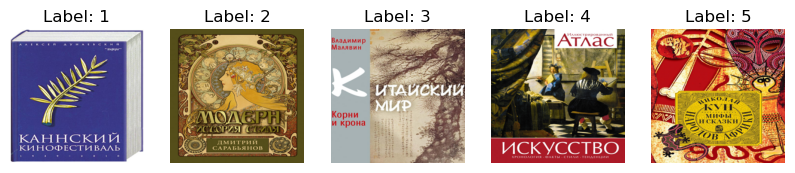

In [46]:
display_examples( images = flip_books_images,
                  labels = ['1','2','3','4','5'],
                  num_examples = 5 )

In [47]:
flip_books_descriptions = flip_books_data['description']

In [51]:
flip_books_descriptions.head(5)

0    Книга Алексея Дунаевского, посвященная истории...
1    Дмитрий Сарабьянов (1923–2013) — советский и р...
2    Новая книга В. В. Малявина — всестороннее иссл...
3    От табличек Месопотамии до цифровой фотографии...
4    Николай Альбертович Кун (1877–1940) — русский ...
Name: description, dtype: object

#### MODELS

##### ENCODER

In [5]:
book_image_encoder24t = tf.keras.models.load_model(r"C:\Users\User\Desktop\DATA SCIENCE\Github\flip_book\models\book_image_encoder24t.keras")

In [6]:
book_image_encoder24t.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (32, 224, 224, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (32, 112, 112, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (32, 112, 112, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (32, 56, 56, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (32, 56, 56, 16)            │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (32, 28, 28, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (32, 16)                    │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,880 (97.19 KB)

 Trainable params: 24,880 (97.19 KB)

 Non-trainable params: 0 (0.00 B)

##### TEXT-EMBEDINGS

In [7]:
from sentence_transformers import SentenceTransformer

In [8]:
labse_transformer = SentenceTransformer('sentence-transformers/LaBSE')

## CLEAN & PREPARE

In [52]:
flip_books_image_embedings = book_image_encoder24t.predict( tf.stack(flip_books_images) )

169/169 ━━━━━━━━━━━━━━━━━━━━ 19s 104ms/step


In [56]:
flip_books_text_embedings = labse_transformer.encode( flip_books_descriptions )

In [61]:
flip_books_text_embedings.shape[0] == flip_books_image_embedings.shape[0]

True

In [65]:
flip_books_data_embeded = pd.concat([
                                      flip_books_data.reset_index(drop=True),
                                      pd.DataFrame(flip_books_image_embedings).add_prefix("img_emb_"),
                                      pd.DataFrame(flip_books_text_embedings).add_prefix("txt_emb_")
                                     ], axis=1)

## SAVE

In [74]:
flip_books_data_embeded.to_csv('flip_books_data_embeded.csv.gz',compression = 'gzip', index = False)